In [130]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
#Importing Data as "df" variable from xls using pandas 
df= pd.read_csv(r'framingham_heart_disease.csv',index_col=None,header=0,sep=',')
df.head()


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [179]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)

In [180]:
display(report)


In [176]:

print(df.dtypes)
print(df.shape)
print(df.info())
print(df[:].describe())

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
(4238, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8 

In [133]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [134]:
#As Education does not play a factor in Heart Attack, I have dropped that column
df= df.drop("education",axis=1)


In [135]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [136]:
for value in ['cigsPerDay', 'BPMeds', 'totChol','BMI','glucose','heartRate']:
    df[value].fillna(round(df[value].mean()), inplace= True)#0.852987
    
#for value in ['cigsPerDay', 'BPMeds', 'totChol','BMI','glucose','heartRate']:
    #df[value].fillna(round(df[value].median()), inplace= True) #0.85220

In [137]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [138]:
df.shape

(4238, 15)

In [139]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [140]:
#Create X and Y (capital variable)
X= df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']] 
Y= df['TenYearCHD'] 

x=df.iloc[:,0:14].values
y=df.iloc[:,-1].values

In [141]:
X

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4235     0   48              1        20.0     0.0                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1                0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2                0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3                1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4                0         0    285.0  130.0   84.0  23.10       85.0     85.0  
...            ...       ...      ...    ...    ...    ...        ...      ...  
4233             1         0    313.0  179.0   92.0  25.97       66.0     86.0  
4234             0         0    207.0  126.5   80.0  19.71       65.0     68.0  
4235             0         0    248.0  131.0   72.0  22.00       84.0     86.0  
4236             0         0    210.0  126.5   87.0  19.16       86.0     82.0  
4237             0         0    269.0  133.5   83.0  21.47       80.0    107.0  

[4238 rows x 14 columns]

In [142]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AEDC3E048>,
      dtype=object)

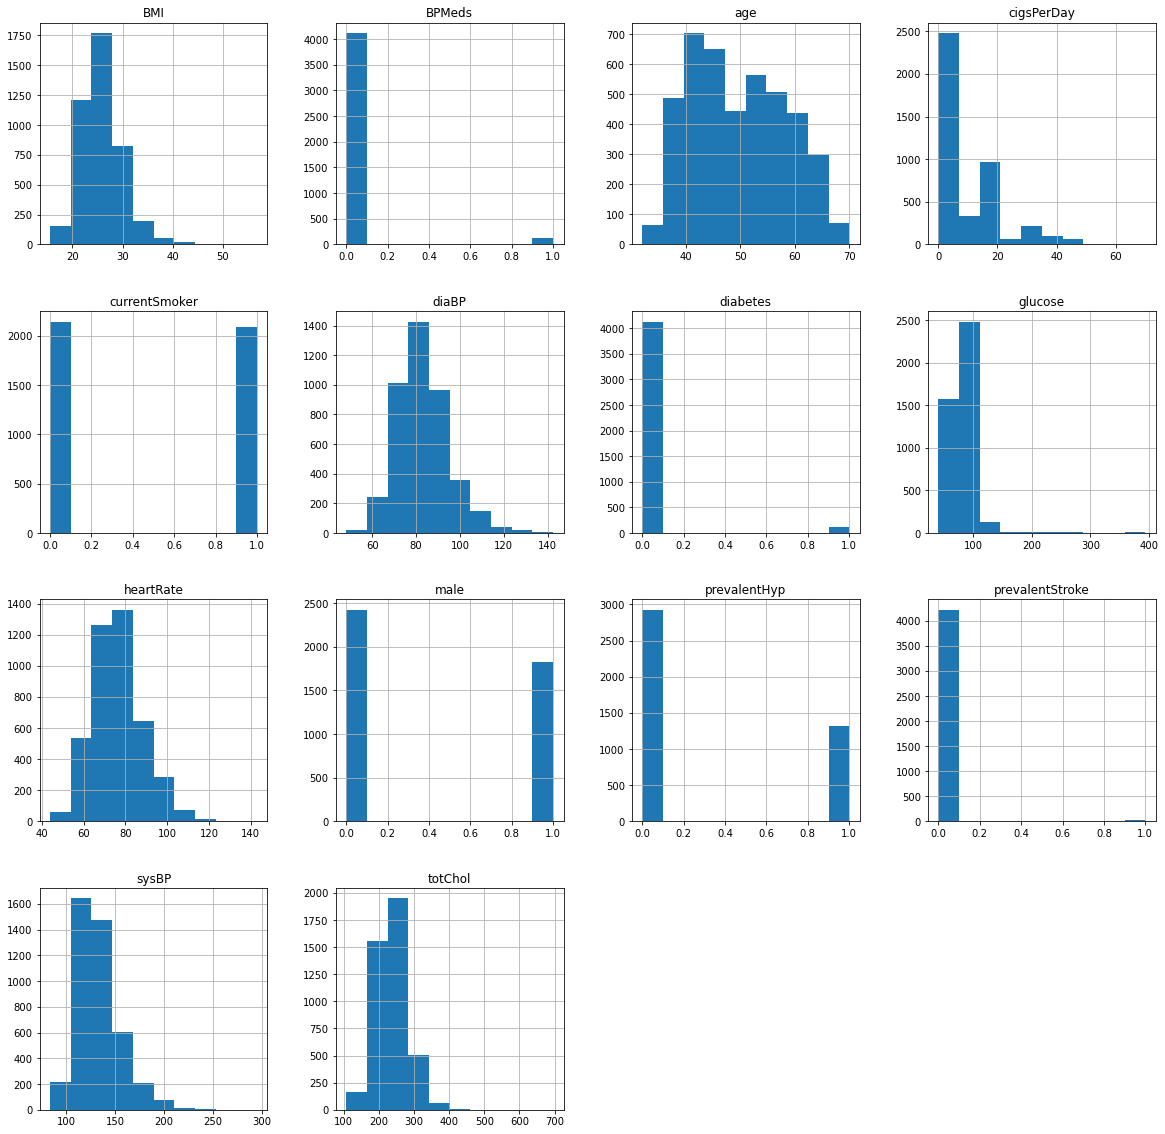

In [143]:
X.hist(figsize=(20,20))


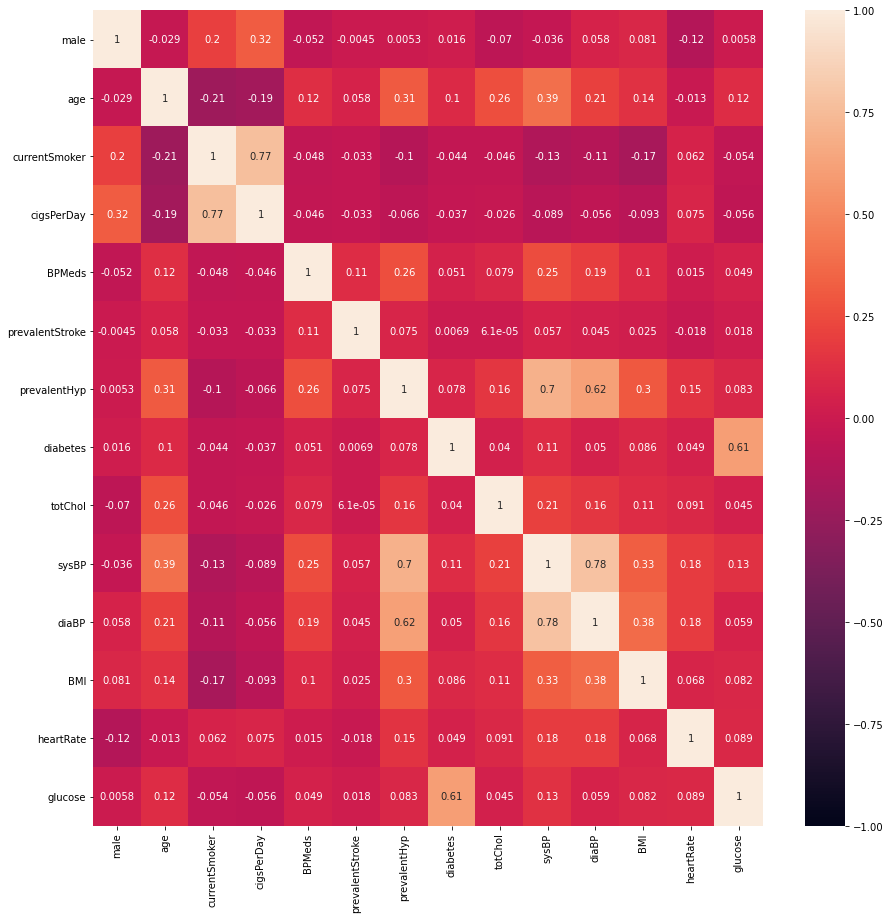

In [144]:
#for larger data map(visualise) is the ideal way to check (multi-colinearity)
corr_df=X.corr(method="pearson")
#print(corr_df)

plt.figure(figsize=(15,15))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)



In [145]:
X.drop('cigsPerDay',axis=1)

male  age  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0        1   39              0     0.0                0             0   
1        0   46              0     0.0                0             0   
2        1   48              1     0.0                0             0   
3        0   61              1     0.0                0             1   
4        0   46              1     0.0                0             0   
...    ...  ...            ...     ...              ...           ...   
4233     1   50              1     0.0                0             1   
4234     1   51              1     0.0                0             0   
4235     0   48              1     0.0                0             0   
4236     0   44              1     0.0                0             0   
4237     0   52              0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0            0    195.0  106.0   70.0  26.97       80.0     77.0  
1            0    250.0  121.0   81.0  28.73       95.0     76.0  
2            0    245.0  127.5   80.0  25.34       75.0     70.0  
3            0    225.0  150.0   95.0  28.58       65.0    103.0  
4            0    285.0  130.0   84.0  23.10       85.0     85.0  
...        ...      ...    ...    ...    ...        ...      ...  
4233         0    313.0  179.0   92.0  25.97       66.0     86.0  
4234         0    207.0  126.5   80.0  19.71       65.0     68.0  
4235         0    248.0  131.0   72.0  22.00       84.0     86.0  
4236         0    210.0  126.5   87.0  19.16       86.0     82.0  
4237         0    269.0  133.5   83.0  21.47       80.0    107.0  

[4238 rows x 13 columns]

In [146]:
#creating X and Y array
X = df.values[:,0:-1]
Y = df.values[:,-1]

In [147]:
X

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  48.  ,   1.  , ...,  22.  ,  84.  ,  86.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,  82.  ],
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ]])

In [148]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [149]:
#scalling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

print(X)


[[ 1.15319190e+00 -1.23495068e+00 -9.88270765e-01 ...  2.86723146e-01
   3.42742056e-01 -2.17649843e-01]
 [-8.67158360e-01 -4.18257334e-01 -9.88270765e-01 ...  7.19103127e-01
   1.59027212e+00 -2.61444356e-01]
 [ 1.15319190e+00 -1.84916377e-01  1.01186844e+00 ... -1.13719678e-01
  -7.31012974e-02 -5.24211434e-01]
 ...
 [-8.67158360e-01 -1.84916377e-01  1.01186844e+00 ... -9.34258960e-01
   6.75416739e-01  1.76500774e-01]
 [-8.67158360e-01 -6.51598291e-01  1.01186844e+00 ... -1.63196302e+00
   8.41754081e-01  1.32272243e-03]
 [-8.67158360e-01  2.81765538e-01 -9.88270765e-01 ... -1.06446430e+00
   3.42742056e-01  1.09618555e+00]]


In [150]:
Y.dtype


dtype('float64')

In [151]:
#changing data type of Y
Y= Y.astype(int)

In [152]:
#splitting into train and test

from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=10)

In [ ]:
#Running Model

In [153]:
#logistic regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

# actual vs predicted values
#print(list(zip(Y_test,Y_pred)))

#intercept values
print(list(zip(df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('male', 0.21571872858374835), ('age', 0.5346710815965524), ('currentSmoker', 0.036774189397180815), ('cigsPerDay', 0.2262780583950584), ('BPMeds', 0.08029379527897844), ('prevalentStroke', 0.09571355006824094), ('prevalentHyp', 0.10035288242935914), ('diabetes', -0.015941163293030313), ('totChol', 0.03506276996140885), ('sysBP', 0.3246093268325365), ('diaBP', -0.052667435174943975), ('BMI', 0.07234870119570366), ('heartRate', 0.024382333158523666), ('glucose', 0.2394563426871119)]
[-1.97061782]


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[1071   13]
 [ 174   14]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.52      0.07      0.13       188

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.52      1272
weighted avg       0.81      0.85      0.80      1272

Accuracy of the model:  0.8529874213836478


In [158]:
#Adujusting threshold

# store the predicted probabilities 
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)


[[0.86119861 0.13880139]
 [0.91604712 0.08395288]
 [0.80114011 0.19885989]
 ...
 [0.92273144 0.07726856]
 [0.96138484 0.03861516]
 [0.95250667 0.04749333]]


In [159]:
#threshold change manually 
y_pred_class=[]  #empty list to append created values
for value in y_pred_prob[:,1]: #only column 1 not 0 from above numbers (class 1)
    if value > 0.40:    #play here with threshold (0.6 to 0.4)
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,y_pred_class)

print(cfm)

acc=accuracy_score(Y_test, y_pred_class)

print("Accuracy of the model: ",acc)

print(classification_report(Y_test, y_pred_class))

[[1041   43]
 [ 166   22]]
Accuracy of the model:  0.835691823899371
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1084
           1       0.34      0.12      0.17       188

    accuracy                           0.84      1272
   macro avg       0.60      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



In [161]:
# using all values to predict AUC
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.7176778283740284


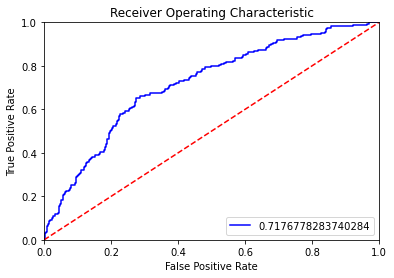

In [162]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc) # b is blue line 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') # x column array, y column array,r-- red dash line 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()



In [163]:
#Using cross validation

classifier=LogisticRegression() #specify algoridhm name which is using here

#performing kfold_cross_validation
from sklearn.model_selection import KFold

kfold_cv=KFold(n_splits=10,random_state=10) #k =10 ,n_splits

#print(kfold_cv)

from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
               y=Y_train, cv=kfold_cv)

#accuracy scores in list/array
print(kfold_cv_result) 

#finding the mean of accuracy score
print(kfold_cv_result.mean())

#Cross validation accuracy- 0.8516448266448267
#regular model- 0.8529874213836478 (going with this)

C:\Users\harita\Documents\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.83164983 0.85185185 0.84848485 0.86531987 0.83501684 0.8989899
 0.85135135 0.83445946 0.84797297 0.85135135]
0.8516448266448267


In [164]:
#using SGD classifier
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,eta0=0.00001,alpha=0.01,max_iter=1000)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [165]:
# number of iterations
classifier.n_iter_

9

In [166]:
# no change in errors for 5 concicutive iterations
classifier.n_iter_no_change

5

In [167]:
#early stopping
classifier.early_stopping

False

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[1070   14]
 [ 177   11]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.44      0.06      0.10       188

    accuracy                           0.85      1272
   macro avg       0.65      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272

Accuracy of the model:  0.8498427672955975


In [ ]:
#Using different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [169]:
#Using SVM (gamma=0.1)

classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) 
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001) 
#classifier=LogisticRegression() 
#classifier=DecisionTreeClassifier(min_samples_leaf=3,random_state=10)

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.82154882 0.85858586 0.84848485 0.86195286 0.82154882 0.88888889
 0.85472973 0.83783784 0.83783784 0.83783784]
0.8469253344253345


In [170]:
#Using SVM (gamma=0.001)

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) 
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001) 
#classifier=LogisticRegression() 
#classifier=DecisionTreeClassifier(min_samples_leaf=3,random_state=10)

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.82154882 0.85858586 0.84848485 0.85185185 0.82828283 0.88552189
 0.85810811 0.83445946 0.83108108 0.83445946]
0.8452384202384202


In [171]:
#KNN

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) 
classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001) 
#classifier=LogisticRegression() 
#classifier=DecisionTreeClassifier(min_samples_leaf=3,random_state=10)

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.81818182 0.85521886 0.84511785 0.85521886 0.82491582 0.87878788
 0.84797297 0.8277027  0.83108108 0.83783784]
0.8422035672035673


In [172]:
#Decision Tree

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) 
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001) 
#classifier=LogisticRegression() 
classifier=DecisionTreeClassifier(min_samples_leaf=3,random_state=10)

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.77441077 0.73737374 0.77441077 0.75084175 0.73063973 0.80808081
 0.76351351 0.77027027 0.73648649 0.79391892]
0.7639946764946766
